Given a weighted undirected connected graph with n vertices numbered from 0 to n - 1, and an array edges where edges[i] = [ai, bi, weighti] represents a bidirectional and weighted edge between nodes ai and bi. A minimum spanning tree (MST) is a subset of the graph's edges that connects all vertices without cycles and with the minimum possible total edge weight.

Find all the critical and pseudo-critical edges in the given graph's minimum spanning tree (MST). An MST edge whose deletion from the graph would cause the MST weight to increase is called a critical edge. On the other hand, a pseudo-critical edge is that which can appear in some MSTs but not all.

Note that you can return the indices of the edges in any order.

 

Example 1:

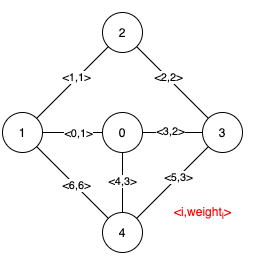

Input: n = 5, edges = [[0,1,1],[1,2,1],[2,3,2],[0,3,2],[0,4,3],[3,4,3],[1,4,6]]
Output: [[0,1],[2,3,4,5]]
Explanation: The figure above describes the graph.
The following figure shows all the possible MSTs:

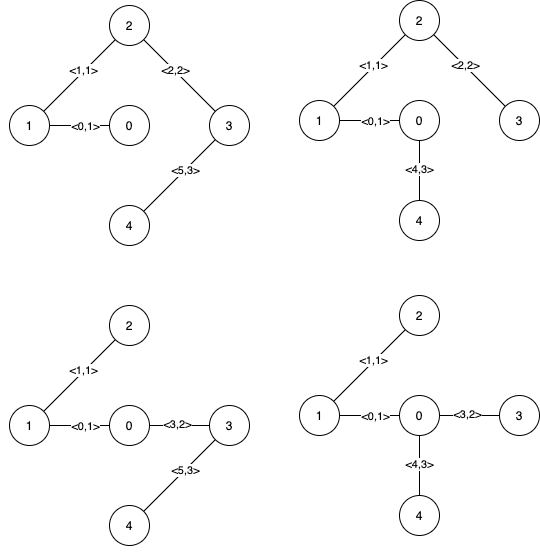

Notice that the two edges 0 and 1 appear in all MSTs, therefore they are critical edges, so we return them in the first list of the output.
The edges 2, 3, 4, and 5 are only part of some MSTs, therefore they are considered pseudo-critical edges. We add them to the second list of the output.

Example 2:

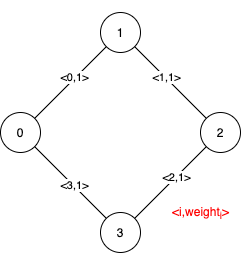

Input: n = 4, edges = [[0,1,1],[1,2,1],[2,3,1],[0,3,1]]
Output: [[],[0,1,2,3]]
Explanation: We can observe that since all 4 edges have equal weight, choosing any 3 edges from the given 4 will yield an MST. Therefore all 4 edges are pseudo-critical.

 

Constraints:

    2 <= n <= 100
    1 <= edges.length <= min(200, n * (n - 1) / 2)
    edges[i].length == 3
    0 <= ai < bi < n
    1 <= weighti <= 1000
    All pairs (ai, bi) are distinct.



In [ ]:
class Solution:
    class UnionFind:
        def __init__(self, n):
            self.parent = list(range(n))
            self.size = [1] * n
            self.max_size = 1

        def find(self, x):
            # Finds the root of x
            if x != self.parent[x]:
                self.parent[x] = self.find(self.parent[x])
            return self.parent[x]

        def union(self, x, y):
            # Connects x and y
            root_x = self.find(x)
            root_y = self.find(y)
            if root_x != root_y:
                if self.size[root_x] < self.size[root_y]:
                    root_x, root_y = root_y, root_x
                self.parent[root_y] = root_x
                self.size[root_x] += self.size[root_y]
                self.max_size = max(self.max_size, self.size[root_x])
                return True
            return False
            
    def findCriticalAndPseudoCriticalEdges(self, n: int, edges: List[List[int]]) -> List[List[int]]:
        new_edges = [edge.copy() for edge in edges]
        # Add index to edges for tracking
        for i, edge in enumerate(new_edges):
            edge.append(i)
        # Sort edges based on weight
        new_edges.sort(key=lambda x: x[2])

        # Find MST weight using union-find
        uf_std = self.UnionFind(n)
        std_weight = 0
        for u, v, w, _ in new_edges:
            if uf_std.union(u, v):
                std_weight += w

        # Check each edge for critical and pseudo-critical
        critical = []
        pseudo_critical = []
        for (u, v, w, i) in new_edges:
            # Ignore this edge and calculate MST weight
            uf_ignore = self.UnionFind(n)
            ignore_weight = 0
            for (x, y, w_ignore, j) in new_edges:
                if i != j and uf_ignore.union(x, y):
                    ignore_weight += w_ignore
            # If the graph is disconnected or the total weight is greater,
            # the edge is critical
            if uf_ignore.max_size < n or ignore_weight > std_weight:
                critical.append(i)
                continue

            # Force this edge and calculate MST weight
            uf_force = self.UnionFind(n)
            force_weight = w
            uf_force.union(u, v)
            for (x, y, w_force, j) in new_edges:
                if i != j and uf_force.union(x, y):
                    force_weight += w_force
            # If total weight is the same, the edge is pseudo-critical
            if force_weight == std_weight:
                pseudo_critical.append(i)

        return [critical, pseudo_critical]